In [10]:
pip install utils_py

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 154.7/154.7 kB 1.2 MB/s eta 0:00:00
  Created wheel for utils_py: filename=utils_py-0.3.0-py3-none-any.whl size=12330 sha256=c50036250d5fdaa0e801e402399ce4ef230f6344ad7ad3f014fa56a8d9769b70
  Stored in directory: c:\users\kiit\appdata\local\pip\cache\wheels\98\c4\2e\7a1f6efdcbdc0309668d7b068c1b85fa07502fe275fa6f6971
Successfully built utils_py
Note: you may need to restart the kernel to use updated packages.


In [12]:
import sys
sys.path.append("/path/to/directory/containing/utils")


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/siddiquiamir/Transfer-Learning-TensorFlow/main/house_data.csv")
df

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313


In [16]:
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [18]:
df.shape

(5000, 7)

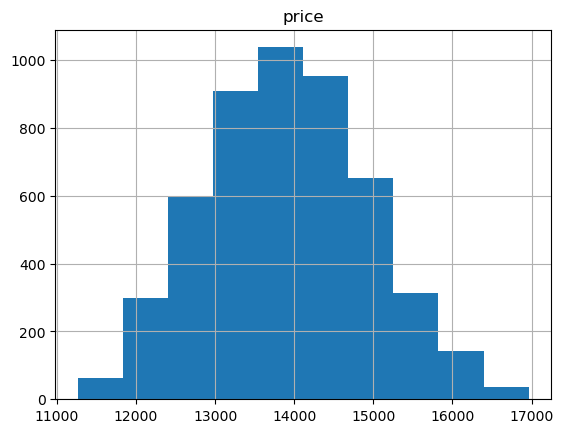

In [20]:
df.hist("price")
plt.show()

In [21]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [22]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [23]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [25]:
X = df_norm.iloc[:, :5]
X.head()


,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [26]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [27]:
X_arr = X.values
Y_arr = Y.values

In [28]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [29]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

# TRAIN TEST SPLIT


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state=1)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


In [31]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [32]:
model = get_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



# Model Training

In [33]:
model = get_model()

# this prediction is before training the model
preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [34]:
# Train model and store in the object history
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000
)

Epoch 1/1000

155/155 [==============================] - 2s 4ms/step - loss: 0.9824 - val_loss: 0.6825
Epoch 2/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9819 - val_loss: 0.6821
Epoch 3/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9814 - val_loss: 0.6817
Epoch 4/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9809 - val_loss: 0.6813
Epoch 5/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9804 - val_loss: 0.6809
Epoch 6/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9799 - val_loss: 0.6806
Epoch 7/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9794 - val_loss: 0.6802
Epoch 8/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9789 - val_loss: 0.6799
Epoch 9/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9784 - val_loss: 0.6795
Epoch 10/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.97

# Prediction

In [37]:

# make predictions on the trained model
preds_on_trained = model.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [42]:
import matplotlib.pyplot as plt
import numpy as np

def compare_predictions(preds_on_untrained, preds_on_trained, y_test):
    """
    Compare and visualize predictions on untrained and trained models.

    Parameters:
    - preds_on_untrained: Predictions made by an untrained model.
    - preds_on_trained: Predictions made by a trained model.
    - y_test: True labels from the test set.
    """
    plt.figure(figsize=(12, 6))

    # Plot predictions on untrained model
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, preds_on_untrained, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.title('Predictions on Untrained Model')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')

    # Plot predictions on trained model
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, preds_on_trained, color='green', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.title('Predictions on Trained Model')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Example usage:
# compare_predictions(preds_on_untrained, preds_on


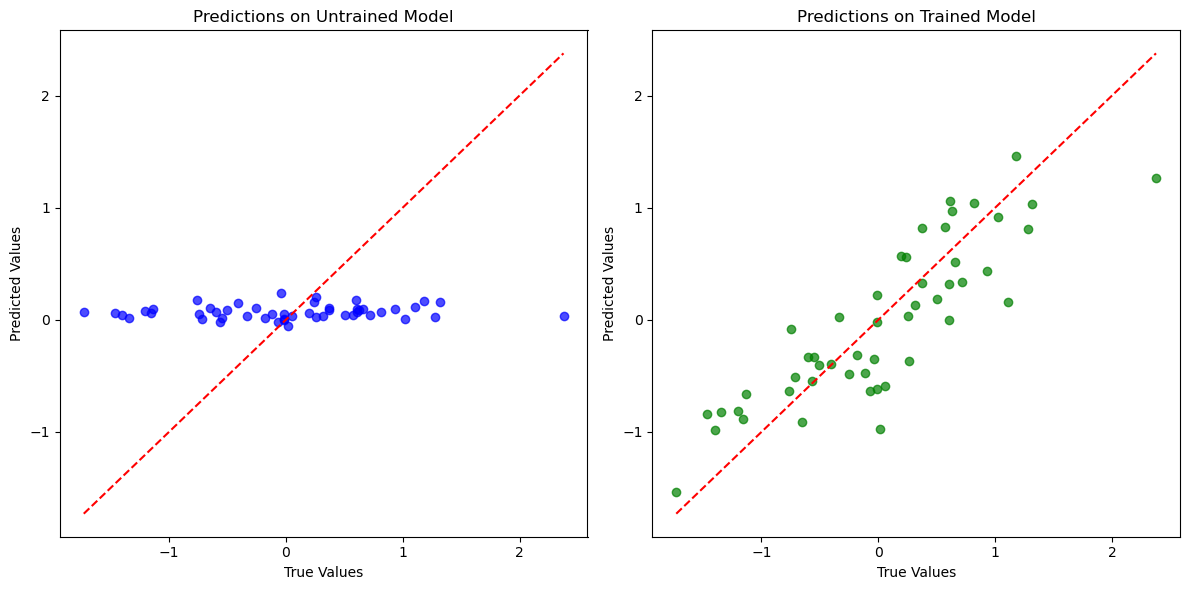

In [43]:
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [40]:
import matplotlib.pyplot as plt

def plot_loss(history):
    """
    Plots the training and validation loss over epochs.

    Parameters:
    - history: History object returned by the fit method of a Keras model.
    """
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Example usage:
# Assuming you have already trained your model and obtained the history object
# history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
# plot_loss(history)


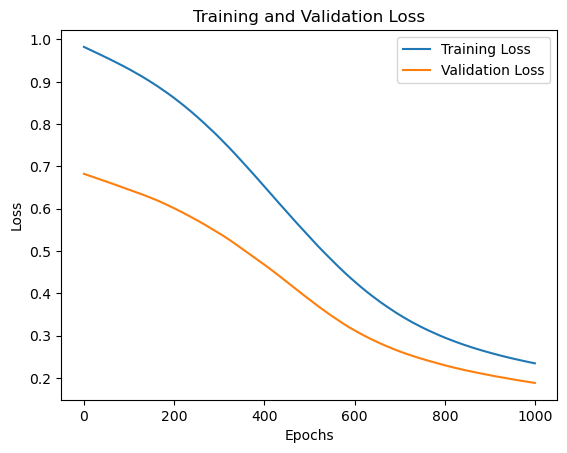

In [41]:
plot_loss(history)